In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# DATA LOADING

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# DATA PREPROCESSING

In [ ]:
data.drop('CustomerID', axis=1, inplace=True)

In [19]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [20]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}

gender_mapping

{0: 0, 1: 1}

# EXPLORATORY DATA ANALYSIS

In [21]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


AGE PLOT

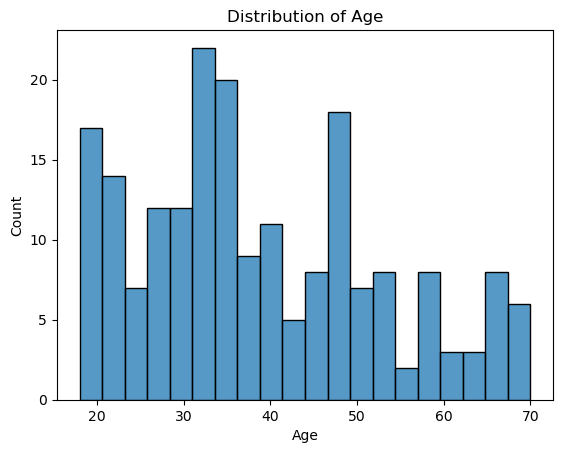

In [22]:
sns.histplot(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

GENDER PLOT

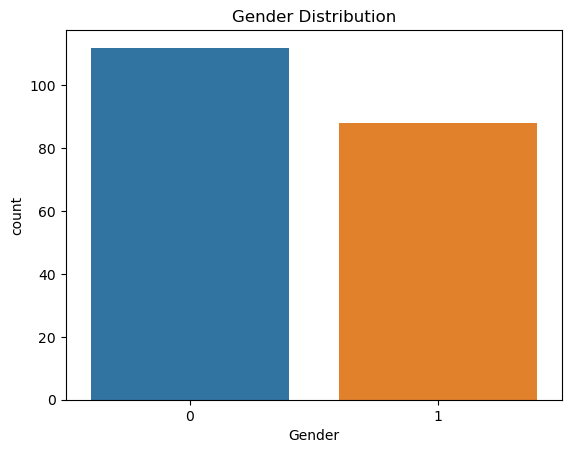

In [23]:
sns.countplot(data=data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender Distribution')
plt.show()

# FEATURE ENGINEERING

In [24]:
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# CLUSTERING ALGORITHM 

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data['Cluster']

C:\Users\ELCOT\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ELCOT\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

# DATA VISUALIZATION

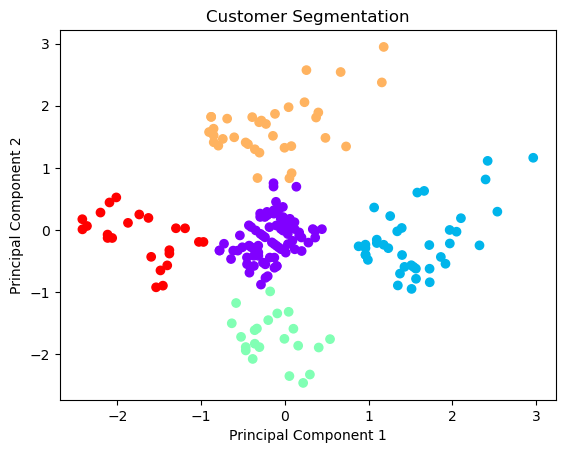

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# DATA INTERPRETATION

In [28]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=selected_features)
print(cluster_df)

   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


# DIMENTIONALITY REDUCTION TECHNIQUES

# PCA

In [30]:
#STANDARDIATION
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_result

array([[ 1.13321385e+00,  1.64920541e+00],
       [-7.49355936e-01,  1.19610390e+00],
       [ 1.77467637e+00,  2.67296733e+00],
       [-8.61051968e-01,  2.22594452e+00],
       [ 1.16040690e+00,  2.36564147e+00],
       [-8.65859943e-01,  2.22951861e+00],
       [ 2.18297717e+00,  2.18132059e+00],
       [-1.32679587e+00,  2.19742284e+00],
       [ 3.33549076e+00,  1.79486407e-01],
       [-5.44106743e-01,  1.93936258e+00],
       [ 3.12253756e+00,  1.04520683e-01],
       [-1.13240412e+00,  1.82504798e+00],
       [ 2.57093726e+00,  1.46482968e+00],
       [-8.49238929e-01,  2.09772047e+00],
       [ 2.31294102e+00,  9.63164210e-01],
       [-6.87671616e-01,  1.04074245e+00],
       [ 1.39011357e+00,  2.14283027e+00],
       [-3.97095798e-01,  1.05908562e+00],
       [ 2.28641042e+00,  4.66454179e-01],
       [-1.12141449e+00,  1.72508275e+00],
       [ 1.64908568e+00,  9.50375094e-01],
       [-4.58788356e-01,  8.46190063e-01],
       [ 2.48727771e+00,  1.68296451e+00],
       [-2.

# T-SNE

In [33]:
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)
tsne_result

array([[ 1.31182957e+00,  9.65650368e+00],
       [ 1.18830395e+00,  3.38449621e+00],
       [-1.13440156e+00,  1.02149601e+01],
       [ 4.66673899e+00,  1.69303298e+00],
       [-1.67332077e+00,  1.05206690e+01],
       [ 4.58079100e+00,  1.60266697e+00],
       [-1.02522016e+00,  1.08504791e+01],
       [ 5.22831202e+00,  1.86676741e+00],
       [ 1.46226180e+00,  1.22387638e+01],
       [ 4.79997301e+00,  1.74883056e+00],
       [ 1.45964026e+00,  1.22269497e+01],
       [ 5.69467878e+00,  1.94836044e+00],
       [-8.53708029e-01,  1.22278957e+01],
       [ 4.76637363e+00,  1.54079783e+00],
       [ 1.30002964e+00,  1.08584299e+01],
       [ 1.05279279e+00,  3.38364124e+00],
       [-1.62274134e+00,  1.07975969e+01],
       [ 1.02924252e+00,  3.72015405e+00],
       [ 1.45005465e+00,  1.14942875e+01],
       [ 5.70622110e+00,  1.88497162e+00],
       [ 1.35425031e+00,  1.05243731e+01],
       [ 8.04934084e-01,  3.53915477e+00],
       [-8.81210864e-01,  1.15855255e+01],
       [ 5.

# VISUALIZATION

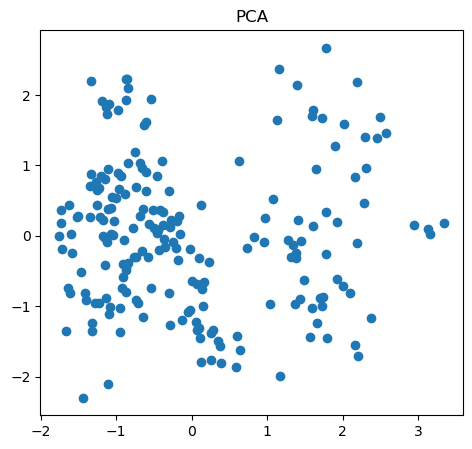

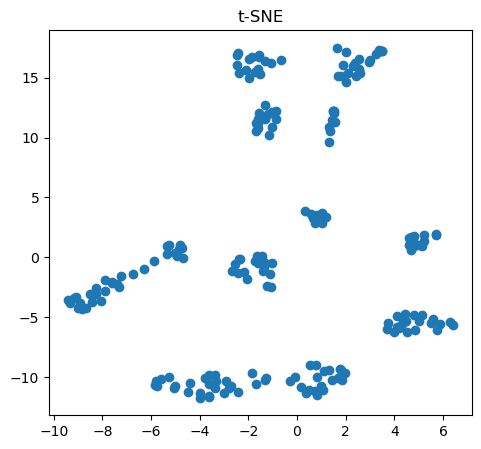

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(pca_result[:, 0], pca_result[:,1])
plt.title('PCA')


plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.scatter(tsne_result[:, 0], tsne_result[:,1])
plt.title('t-SNE')


plt.show()